Tài liệu này mang giấy phép Creative Commons Attribution (CC BY).(c) Nguyễn Ngọc Sáng, Zhukovsky 12/2018.

[@SangVn](https://github.com/SangVn) [@VnCFD](https://vncfdgroup.wordpress.com/)

*Thực hành CFD với Python!*

<h1><center> Bài 10. Hệ phương trình Navier - Stokes cho chất lỏng không nén được. Biến vector xoáy và hàm dòng </center></h1>

Phương trình Navier-Stokes 2D cho chất lỏng không nén được có thể giaỉ mà không cần tới phương trình Poisson áp suất nếu chúng ta sử dụng hai biến: vector xoáy và hàm dòng (tham khảo: [vector xoáy](https://vncfdgroup.wordpress.com/2012/03/22/dong-ch%E1%BA%A3y-khong-xoay-th%E1%BA%BF-dong-ch%E1%BA%A3y/), [hàm dòng](https://vncfdgroup.wordpress.com/2012/04/14/bai-11-l%c6%b0u-s%e1%bb%91-v%e1%ba%adn-t%e1%bb%91c/)).

Vector xoáy được định nghĩa: $\omega = rot(\vec v) = \frac {\partial u}{\partial y} - \frac {\partial v}{\partial x} \qquad (1)$

Hàm dòng kí hiệu $\psi$ với: $u = \frac{\partial \psi}{\partial y}, v = -\frac{\partial \psi}{\partial x} \qquad (2)$

Để triệt tiêu áp suất và sử dụng hai biến này ta biến đổi phương trình Navier-Stokes như sau:
$$\frac {\partial u}{\partial x} + \frac {\partial v}{\partial y}  = 0 \qquad (3)$$

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) \qquad (4)$$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) \qquad (5)$$

Lấy $\frac {\partial}{\partial y}(4) - \frac {\partial}{\partial x}(5)$ ta thu được:
$$\frac{\partial \omega}{\partial t} + \frac{\partial(u\omega)}{\partial x} +  \frac{\partial(v\omega)}{\partial y} = \nu \left(\frac{\partial^2\omega}{\partial x^2} + \frac{\partial^2\omega}{\partial y^2} \right) \qquad (6)$$

Mặt khác thay (2) vào (1) ta có: $\Delta \psi = \omega \quad (7)$.

Như vậy chúng ta sẽ giải hệ phương trình (6), (7), (2). 

## Sơ đồ sai phân

Sơ đồ sai phân cho phương trình (6):
$$\frac{\omega^{n+1}_{ij}-\omega^n_{ij}}{\Delta t}+u_{ij}\left(\frac{\omega^n_{i+1,j}-\omega^n_{i-1,j}}{2\Delta x}\right)+v_{ij}\left(\frac{\omega^n_{i,j+1}-\omega^n_{i,j-1}}{2\Delta y}\right)=\nu\left(\frac{\omega^n_{i+1,j}-2\omega^n_{ij}+\omega^n_{i-1,j}}{\Delta x^2}+\frac{\omega^n_{i,j+1}-2\omega^n_{ij}+\omega^n_{i,j-1}}{\Delta y^2}\right)$$

Ta có công thức xác định nghiệm:

$$
\begin{split}
\omega^{n+1}_{ij} = \omega^n_{ij} - {\Delta t}\left[\frac{\psi^n_{i,j+1} - \psi^n_{i,j-1}}{2\Delta y}\frac{\omega^n_{i+1,j}-\omega^n_{i-1,j}}{2\Delta x} - \frac{\psi^n_{i+1,j} - \psi^n_{i-1,j}}{2\Delta x} \frac{\omega^n_{i,j+1}-\omega^n_{i,j-1}}{2\Delta y} + \\
\nu\left(\frac{\omega^n_{i+1,j}-2\omega^n_{ij}+\omega^n_{i-1,j}}{\Delta x^2}+\frac{\omega^n_{i,j+1}-2\omega^n_{ij}+\omega^n_{i,j-1}}{\Delta y^2}\right) \right]
\end{split}
$$

Đối với phương trình Poisson áp suất, có thể sử dụng hai phương pháp sau:
* phương pháp `bất ổn giả (pseudo-unsteady)`:

$$\frac{\partial \psi}{\partial t} - \left[\frac{\partial^2 \psi}{\partial x^2} + \frac{\partial^2 \psi}{\partial y^2} - \omega \right] = 0 \quad (8)$$

Hay ta có:

$$ \psi^{n+1} = \psi^n + \Delta \tau \left[\frac{\psi^{n}_{i+1,j}-2\psi^{n}_{ij}+\psi^{n}_{i-1,j}}{\Delta x^2}+\frac{\psi^{n}_{i,j+1}-2\psi^{n}_{ij}+\psi^{n}_{i,j-1}}{\Delta y^2} -\omega^{n}_{ij} \right]$$
Ở đây thêm vào bước thời gian $\Delta \tau$, thực hiện vòng lặp tìm $\psi$ cho đến khi nghiệm ổn định (sai khác giữa hai bước liên tiếp rất nhỏ), khi đó phương trình (8) trở thành (7).
* phương pháp Jacobi (bài 4):

$$\frac{\psi^{n}_{i+1,j}-2\psi^{n}_{ij}+\psi^{n}_{i-1,j}}{\Delta x^2}+\frac{\psi^{n}_{i,j+1}-2\psi^{n}_{ij}+\psi^{n}_{i,j-1}}{\Delta y^2}=\omega^{n}_{ij}$$

ta có:

$$\psi_{ij} = \frac{\Delta y^2 (\psi_{i+1, j} + \psi_{i-1, j}) + \Delta x^2 (\psi_{i, j+1} + \psi_{i, j-1})}{2(\Delta x^2 + \Delta y^2)} - \frac{\Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}\omega^n_{ij}  $$


## Điều kiện biên bậc 1

Tương ứng với điều kiện biên $u=0, v=0$ tại thành hố, $u = UWall$ tại miệng hố ta có điều kiện cho vector xoáy và hàm dòng như trên hình:

<img src='Bai_10.png' width="500">

Cụ thể, điều kiện biên của hàm dòng $\psi = 0$ tại biên. Đối với vector xoáy ta biến đổi như sau để thu được điều kiện biên:
$$
\begin{array}{l}
\psi_{i, -2} = \psi_{i, -1} - \Delta y \frac{\partial \psi}{\partial y} + \frac{\Delta y^2}{2}\frac{\partial^2 \psi}{\partial y^2} + ...\\
\frac{\partial \psi}{\partial y}|_{i,-1} = u_{i, -1} = UWall \\
\omega_{i, -1} = \frac{\partial u}{\partial y}|_{i, -1} - \frac{\partial v}{\partial x}|_{i, -1} = \frac{\partial^2 \omega}{\partial y^2}
\end{array}
$$

Hay ta có: $$\omega_{i, -1} = \frac{2*(\psi_{i, -2} + \Delta y UWall)}{\Delta y^2}$$
Tương tự ta có: 

$$
\omega_{i, 0} = \frac{2*\psi_{i, 1}}{\Delta y^2};\quad
\omega_{0, j} = \frac{2*\psi_{1, j}}{\Delta x^2};\quad
\omega_{-1, j} = \frac{2*\psi_{-2, j}}{\Delta x^2}
$$

## Điều kiện biên bậc 2  (Briley, Gupta, Manohar)
([tham khảo](https://ro.uow.edu.au/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=3655&context=theses))

Cho các tham số:
$$p \neq q > 0, \alpha = \frac{2}{p^3q^3(p-q)}$$

Điều kiện biên:
$$
\begin{array}{l}
\omega_{0,j} = \frac{2\alpha}{\Delta x^2}(-q^3\psi_{p,j} + p^3\psi_{q,j}); \quad x= 0\\
\omega_{-1,j} = \frac{2\alpha}{\Delta x^2}(-q^3\psi_{-1-p,j} + p^3\psi_{-1-q,j}); \quad x= 1\\
\omega_{i, 0} = \frac{2\alpha}{\Delta y^2}(-q^3\psi_{i,p} + p^3\psi_{i,q}); \quad y= 0\\
\omega_{i, -1} = \frac{2}{\Delta y^2}(-q^3\alpha\psi_{i, -1-p} + p^3\alpha\psi_{i,-1-q} +\frac{2\Delta y(p+q)}{pq}); \quad y= 1
\end{array}
$$
Chúng ta sẽ lấy p = 2, q = 1.

**Coding**

Khác với các bài trước, mảng hai chiều chúng ta sẽ khái báo và sử dụng đúng thứ tự u[i, j], v[i, j]. Khi đó để biểu diễn nghiệm thu được ở cuối bài, cần sử dụng matran chuyển vị u.T, v.T.

In [175]:
#import thư viện
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

#giải phương trình poisson hàm dòng p
def jacobi_method(p, o, dx, dy, err_val, maxiter):
    pn = p.copy()           #khai báo mảng un chứa giá trị tạm thời
    norm = 2*err_val        #gán giá trị chuẩn ban đầu > err_val 
    iter = 0
    while (True):
        iter += 1
        pn = p.copy()       #lưu giá trị hiện tại
        
        #tính u[j, i] ở bước tiếp theo
        p[1:-1, 1:-1] = (dy**2*(pn[2:, 1:-1] + pn[0:-2, 1:-1]) + dx**2*(pn[1:-1, 2:] + pn[1:-1, 0:-2]) -\
                           dx**2*dy**2*o[1:-1, 1:-1])/(2*(dx**2 + dy**2))
        #điều kiện biên
        p[0, :] = 0         #u = 0, x = 0
        p[-1, :] = 0        #u = 1, x = 1
        p[:, 0] = 0         #u = 0, y = 0
        p[:, -1] = 0        #u = 1, y = 1

        #tính chuẩn 
        tmp = np.sum(np.abs(p))
        if tmp > 0: norm = (tmp  - np.sum(np.abs(pn)))/tmp

        #kiểm tra điều kiện thoát khỏi vòng lặp
        if (norm < err_val or iter > maxiter): break 
    
    return p

#hàm boundary conditions
def boco_first_order(o, p, UWall):
    o[0, 1:-1] = 2*p[1, 1:-1]/dx**2
    o[-1, 1:-1] = 2*p[-2, 1:-1]/dx**2       
    o[1:-1, 0] = 2*p[1:-1, 1]/dy**2
    o[1:-1, -1] = 2*(p[1:-1, -2] + UWall*dy)/dy**2 
    
def boco_second_order(o, p, UWall):
    #p = 2, q = 1, alpha = 0.25    
    a = 0.25
    o[0, 1:-1] = 2*a*(-p[2, 1:-1] + 8*p[1, 1:-1])/dx**2
    o[-1, 1:-1] = 2*a*(-p[-3, 1:-1] + 8*p[-2, 1:-1])/dx**2       
    o[1:-1, 0] = 2*a*(-p[1:-1, 2] + 8*p[1:-1, 1])/dy**2
    o[1:-1, -1] = 2*(-a*p[1:-1, -3] + 8*a*p[1:-1, -2] + 3*UWall*dy)/dy**2

#hàm solver
def solver(o, p, u, v, bcf, dx, dy, dt, UWall, nu, err_val, maxiter, nt):
    #điều kiện ban đầu 
    o[:, :] = 0
    p[:, :] = 0
    
    #nghiệm tạm thời
    on = o.copy()
    #hằng số
    dtb2dx = dt/(2*dx)
    dtb2dy = dt/(2*dy)
    dtnubdx2 = dt*nu/dx**2
    dtnubdy2 = dt*nu/dy**2

    for n in range(nt):
        on = o.copy()
        #tìm vector xoáy omega 
        o[1:-1, 1:-1] = on[1:-1, 1:-1] - dtb2dx*(u[2:, 1:-1]*on[2:, 1:-1] - u[0:-2, 1:-1]*on[0:-2, 1:-1]) -\
                        dtb2dy*(v[1:-1, 2:]*on[1:-1, 2:] - v[1:-1, 0:-2]*on[1:-1, 0:-2]) +\
                        dtnubdx2*(on[2:, 1:-1] - 2*on[1:-1, 1:-1] + on[0:-2, 1:-1]) +\
                        dtnubdy2*(on[1:-1, 2:] - 2*on[1:-1, 1:-1] + on[1:-1, 0:-2])                        
        
        #tìm hàm dòng psi 
        p = jacobi_method(p, o, dx, dy, err_val, maxiter)
        
        #tính vận tốc u, v
        u[1:-1, 1:-1] = (p[1:-1, 2:] - p[1:-1, 0:-2])/(2*dy)
        v[1:-1, 1:-1] = -(p[2:, 1:-1] - p[0:-2, 1:-1])/(2*dx)
        
        #điều kiện biên 
        bcf(o, p, UWall)

    return u, v

In [176]:
#chia lưới 
nx = 101
ny = 101
x, dx = np.linspace(0, 1, nx, retstep=True)
y, dy = np.linspace(0, 1, ny, retstep=True)

#thông số
err_val = 1e-4
maxiter = 500
UWall = 1
nu = 0.01 #Reynolds = (UWall*L)/nu = 100, hãy thử thay đổi Re
dt = 0.001 

u = np.zeros((nx, ny))
v = np.zeros((nx, ny))
u[-1, :] = UWall
o = np.zeros((nx, ny))
p = np.zeros((nx, ny))

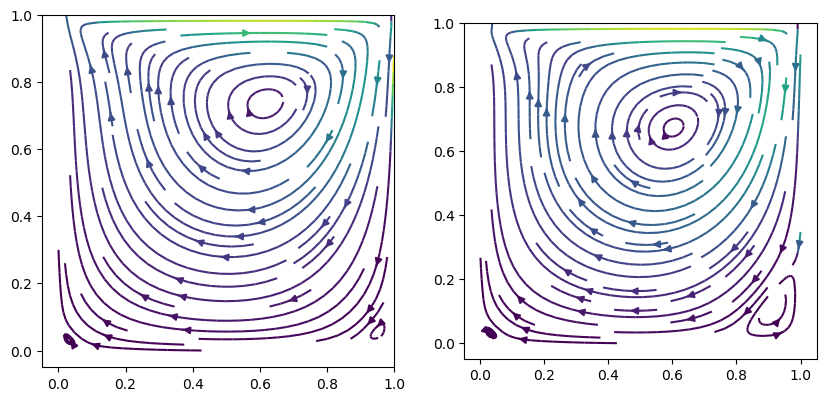

In [177]:
#biểu diễn nghiệm 
fig = plt.figure(figsize=(10,10), dpi=100)
ax1 = fig.add_subplot(1, 2, 1, aspect='equal') 
ax2 = fig.add_subplot(1, 2, 2, aspect='equal')
X, Y = np.meshgrid(x, y)

u1, v1 = solver(o, p, u, v, boco_first_order, dx, dy, dt, UWall, nu, err_val, maxiter, 8000)
U1 =np.sqrt(u1**2 + v1**2)
ax1.streamplot(X, Y, u1.T, v1.T, color=U1.T, density=1)

u2, v2 = solver(o, p, u, v, boco_second_order, dx, dy, dt, UWall, nu, err_val, maxiter, 8000)
U2 =np.sqrt(u2**2 + v2**2)
ax2.streamplot(X, Y, u2.T, v2.T, color=U2.T, density=1)  

plt.show()

Như vậy tới bây giờ, sau 10 bài thực hành, với điều kiện biên hợp lý các bạn đã có thể mô phỏng dòng chảy đơn giản 2D không nén được trong đường ống, trong kênh hở, dòng chảy qua vật cản, thậm chí giọt nước rơi...([ví dụ tham khảo](https://www.particleincell.com/2016/vorticity-streamfunction-cylindrical/)). Tuy nhiên mọi thứ chưa thực sự rõ ràng và sẽ không bao giờ rõ ràng được mọi thứ. Còn vô vàn các vấn đề mà chúng ta cần nghiên cứu trong lĩnh vực `CFD - Tính toán động lực học lưu chất`.

Để tìm hiểu thêm, các bạn hãy tìm đọc hai quyển tài liệu đã được giới thiệu ở bài đầu khóa học. Chúng ta kết thúc phần I ở đây. 

**`Chúc các bạn may mắn và hẹn gặp lại ở phần sau!`**